# BBC News Classification With ( ML & NLP )

# About Dataset


* Context
News article datasets, originating from BBC News, provided for use as benchmarks for machine learning research. The original data is processed to form a single csv file for ease of use, the news title and the related text file name is preserved along with the news content and its category. This dataset is made available for non-commercial and research purposes only.

- All rights, including copyright, in the content of the original articles are owned by the BBC.
Content

- Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.

## Class Labels :- 
## 1. Business
## 2. Entertainment
## 3. Politics
## 4. Sport 
## 5. Tech

## Using Different - Different Machine learning Model used but Best Accuracy in Multinomial Naive Bayes Classifier (MultinomialNB) Accuracy- 98%.

# Importing Required Libraries :-)

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Loading the Dataset 

In [2]:
import urllib.request

In [3]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/bbc-news-data.csv'

In [4]:
local_file,headers = urllib.request.urlretrieve(url)


In [5]:
df_news = pd.read_csv(local_file, sep='\t')

In [6]:
df_news

category filename                              title  \
0     business  001.txt  Ad sales boost Time Warner profit   
1     business  002.txt   Dollar gains on Greenspan speech   
2     business  003.txt  Yukos unit buyer faces loan claim   
3     business  004.txt  High fuel prices hit BA's profits   
4     business  005.txt  Pernod takeover talk lifts Domecq   
...        ...      ...                                ...   
2220      tech  397.txt   BT program to beat dialler scams   
2221      tech  398.txt    Spam e-mails tempt net shoppers   
2222      tech  399.txt            Be careful how you code   
2223      tech  400.txt    US cyber security chief resigns   
2224      tech  401.txt   Losing yourself in online gaming   

                                                content  
0      Quarterly profits at US media giant TimeWarne...  
1      The dollar has hit its highest level against ...  
2      The owners of embattled Russian oil giant Yuk...  
3      British Airways has blamed high fuel prices f...  
4      Shares in UK drinks and food firm Allied Dome...  
...                                                 ...  
2220   BT is introducing two initiatives to help bea...  
2221   Computer users across the world continue to i...  
2222   A new European directive could put software w...  
2223   The man making sure US computer networks are ...  
2224   Online role playing games are time-consuming,...  

[2225 rows x 4 columns]

# EDA 

In [7]:
df_news.drop('filename',axis=1,inplace=True)

In [8]:
df_news

category                              title  \
0     business  Ad sales boost Time Warner profit   
1     business   Dollar gains on Greenspan speech   
2     business  Yukos unit buyer faces loan claim   
3     business  High fuel prices hit BA's profits   
4     business  Pernod takeover talk lifts Domecq   
...        ...                                ...   
2220      tech   BT program to beat dialler scams   
2221      tech    Spam e-mails tempt net shoppers   
2222      tech            Be careful how you code   
2223      tech    US cyber security chief resigns   
2224      tech   Losing yourself in online gaming   

                                                content  
0      Quarterly profits at US media giant TimeWarne...  
1      The dollar has hit its highest level against ...  
2      The owners of embattled Russian oil giant Yuk...  
3      British Airways has blamed high fuel prices f...  
4      Shares in UK drinks and food firm Allied Dome...  
...                                                 ...  
2220   BT is introducing two initiatives to help bea...  
2221   Computer users across the world continue to i...  
2222   A new European directive could put software w...  
2223   The man making sure US computer networks are ...  
2224   Online role playing games are time-consuming,...  

[2225 rows x 3 columns]

In [9]:
df_news.info

<bound method DataFrame.info of       category                              title  \
0     business  Ad sales boost Time Warner profit   
1     business   Dollar gains on Greenspan speech   
2     business  Yukos unit buyer faces loan claim   
3     business  High fuel prices hit BA's profits   
4     business  Pernod takeover talk lifts Domecq   
...        ...                                ...   
2220      tech   BT program to beat dialler scams   
2221      tech    Spam e-mails tempt net shoppers   
2222      tech            Be careful how you code   
2223      tech    US cyber security chief resigns   
2224      tech   Losing yourself in online gaming   

                                                content  
0      Quarterly profits at US media giant TimeWarne...  
1      The dollar has hit its highest level against ...  
2      The owners of embattled Russian oil giant Yuk...  
3      British Airways has blamed high fuel prices f...  
4      Shares in UK drinks and food firm 

In [10]:
df_news.isnull().sum()

category    0
title       0
content     0
dtype: int64

In [11]:
df_news.head(5)

category                              title  \
0  business  Ad sales boost Time Warner profit   
1  business   Dollar gains on Greenspan speech   
2  business  Yukos unit buyer faces loan claim   
3  business  High fuel prices hit BA's profits   
4  business  Pernod takeover talk lifts Domecq   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...

In [12]:
df_news.shape

(2225, 3)

In [13]:
df_news['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [14]:
tags = df_news['category'].value_counts()
tags

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

# Visualization

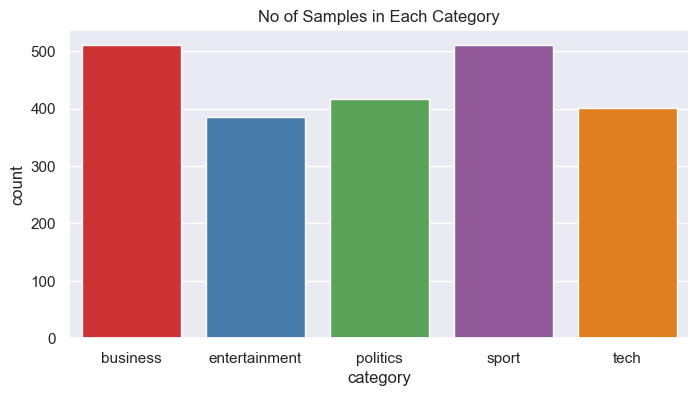

In [15]:
# Visualization

# Set the style
sns.set(style='darkgrid')

# Choose a different color palette
color_palette = 'Set1'  # Use the 'Set1' color palette

# Create the plot
plt.figure(figsize=(8, 4))
sns.countplot(x='category', data=df_news, palette=color_palette)
plt.title('No of Samples in Each Category')

# Show the plot
plt.show()

In [16]:
# Calculate the count and frequency of each category
category_counts = df_news['category'].value_counts().to_frame().reset_index()

# Create the pie chart
fig = px.pie(category_counts, values='category', names='index',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title='Count and Frequency News Category in DataFrame',
             labels={'category': 'Count', 'index': 'Category'})

# Show the pie chart
fig.show()


In [17]:
# join title and content
df_news['text_join'] = df_news['title']+ ' ' + df_news['content']

In [18]:
df_news.head(5)

category                              title  \
0  business  Ad sales boost Time Warner profit   
1  business   Dollar gains on Greenspan speech   
2  business  Yukos unit buyer faces loan claim   
3  business  High fuel prices hit BA's profits   
4  business  Pernod takeover talk lifts Domecq   

                                             content  \
0   Quarterly profits at US media giant TimeWarne...   
1   The dollar has hit its highest level against ...   
2   The owners of embattled Russian oil giant Yuk...   
3   British Airways has blamed high fuel prices f...   
4   Shares in UK drinks and food firm Allied Dome...   

                                           text_join  
0  Ad sales boost Time Warner profit  Quarterly p...  
1  Dollar gains on Greenspan speech  The dollar h...  
2  Yukos unit buyer faces loan claim  The owners ...  
3  High fuel prices hit BA's profits  British Air...  
4  Pernod takeover talk lifts Domecq  Shares in U...

In [19]:
df_news.drop(["title", "content"], axis=1, inplace=True)

In [20]:
df_news.tail(5)

category                                          text_join
2220     tech  BT program to beat dialler scams  BT is introd...
2221     tech  Spam e-mails tempt net shoppers  Computer user...
2222     tech  Be careful how you code  A new European direct...
2223     tech  US cyber security chief resigns  The man makin...
2224     tech  Losing yourself in online gaming  Online role ...


# Text Preprocessing (NLP)


# Convert in to  Lowercase

In [21]:
# Data Cleaning
df_news["clean_text"] = df_news["text_join"].str.lower()

In [22]:
df_news.sample(frac=1).head()

category                                          text_join  \
1899      tech  Google launches TV search service  The net sea...   
1740     sport  Federer forced to dig deep  Top seed Roger Fed...   
1329     sport  Call for Kenteris to be cleared  Kostas Kenter...   
418   business  $1m payoff for former Shell boss  Shell is to ...   
1255  politics  Will the Budget bring out smiling voters?  As ...   

                                             clean_text  
1899  google launches tv search service  the net sea...  
1740  federer forced to dig deep  top seed roger fed...  
1329  call for kenteris to be cleared  kostas kenter...  
418   $1m payoff for former shell boss  shell is to ...  
1255  will the budget bring out smiling voters?  as ...

# Removal of Punctuations

In [23]:
def remove_punctuations(text):
    PUNCT_TO_REMOVE = string.punctuation
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


In [24]:
df_news['clean_text']= df_news['clean_text'].apply(lambda x: remove_punctuations(x))

In [25]:
df_news.iloc[0]['clean_text']

'ad sales boost time warner profit  quarterly profits at us media giant timewarner jumped 76 to 113bn £600m for the three months to december from 639m yearearlier  the firm which is now one of the biggest investors in google benefited from sales of highspeed internet connections and higher advert sales timewarner said fourth quarter sales rose 2 to 111bn from 109bn its profits were buoyed by oneoff gains which offset a profit dip at warner bros and less users for aol  time warner said on friday that it now owns 8 of searchengine google but its own internet business aol had has mixed fortunes it lost 464000 subscribers in the fourth quarter profits were lower than in the preceding three quarters however the company said aols underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aols existing customers for highspee

# Removal of Stopwords

In [26]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [27]:
def remove_stopwords(text):
    STOPWORDS = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])



In [28]:
df_news['clean_text']= df_news['clean_text'].apply(lambda x: remove_stopwords(x))

# Removal of Frequent Words

In [29]:
from collections import Counter
cnt = Counter()
for text in df_news["clean_text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(15)

[('said', 7253),
 ('mr', 3004),
 ('would', 2577),
 ('also', 2156),
 ('new', 1970),
 ('people', 1969),
 ('us', 1908),
 ('one', 1739),
 ('year', 1607),
 ('could', 1510),
 ('last', 1381),
 ('first', 1282),
 ('years', 1223),
 ('two', 1175),
 ('time', 1147)]

In [30]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(15)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [31]:
df_news['clean_text']= df_news['clean_text'].apply(lambda x: remove_freqwords(x))

# Removal of Rare words

In [32]:
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-10:-1]])
RAREWORDS

{'ahhhh',
 'counsellor',
 'enviroment',
 'frag',
 'hrs',
 'lol',
 'person191s',
 'relasing',
 'trifling'}

In [33]:
def remove_rare_words(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

In [34]:
df_news['clean_text']= df_news['clean_text'].apply(lambda x: remove_rare_words(x))

# Removal of Special Characters

In [35]:
import re 
def remove_spl_chars(text):
    text = re.sub('^a-zA-Z0-9',' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [36]:
df_news['clean_text']= df_news['clean_text'].apply(lambda x: remove_spl_chars(x))

# Removal of HTML Tags

In [37]:
def remove_tags(text):
    cleand_text = re.sub(re.compile('<.*?>'), '', text)
    return cleand_text


In [38]:
df_news['clean_text']= df_news['clean_text'].apply(lambda x: remove_tags(x))

# Removal of URL

In [39]:
def remove_urls(text):
    url_pattern = re.sub (re.compile(r'https?://\S+|www\.\S+'), '', text)
    return url_pattern

In [40]:
df_news['clean_text']= df_news['clean_text'].apply(lambda x: remove_urls(x))

# Lemmatization & POS Tagging

In [41]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [42]:
lemmatizer = WordNetLemmatizer()


In [43]:
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}


In [44]:
def lemmatize_words(text): 
    pos_text = pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])


In [45]:
df_news['Lemmatization']= df_news['clean_text'].apply(lambda x: lemmatize_words(x))

In [46]:
df_news.drop(["text_join"], axis=1, inplace=True)

In [47]:
df_news.sample(frac=1).head(10)

category                                         clean_text  \
542   entertainment  dvd review harry potter prisoner azkaban third...   
1218       politics  kennedy predicts bigger turnout voters pent pa...   
61         business  wembley firm wont make profit shares multiplex...   
1904           tech  savvy searchers fail spot ads internet search ...   
2183           tech  confusion highdefinition tv critical mass embr...   
2058           tech  internet boom gift shopping cyberspace becomin...   
731   entertainment  school tribute tv host carson 1000 turned sund...   
2134           tech  mobile games come age bbc news website takes l...   
1590          sport  robben cole earn chelsea win cheslea salvaged ...   
1528          sport  reaction spanish press englands 10 defeat spai...   

                                          Lemmatization  
542   dvd review harry potter prisoner azkaban third...  
1218  kennedy predicts big turnout voter pent passio...  
61    wembley firm wont make profit share multiplex ...  
1904  savvy searcher fail spot ad internet search en...  
2183  confusion highdefinition tv critical mass embr...  
2058  internet boom gift shopping cyberspace become ...  
731   school tribute tv host carson 1000 turn sunday...  
2134  mobile game come age bbc news website take loo...  
1590  robben cole earn chelsea win cheslea salvage w...  
1528  reaction spanish press englands 10 defeat spai...

# Dealing with Duplicates

In [48]:
df_news["Lemmatization"].duplicated().sum()

108

In [49]:
df_news.drop_duplicates("Lemmatization", inplace=True)

In [50]:
df_news["Lemmatization"].duplicated().sum()

0

# Create WordCloud

In [51]:
stopwords = set(STOPWORDS)
totalTarget = ' '.join(df_news['Lemmatization'])
wordCloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(totalTarget)


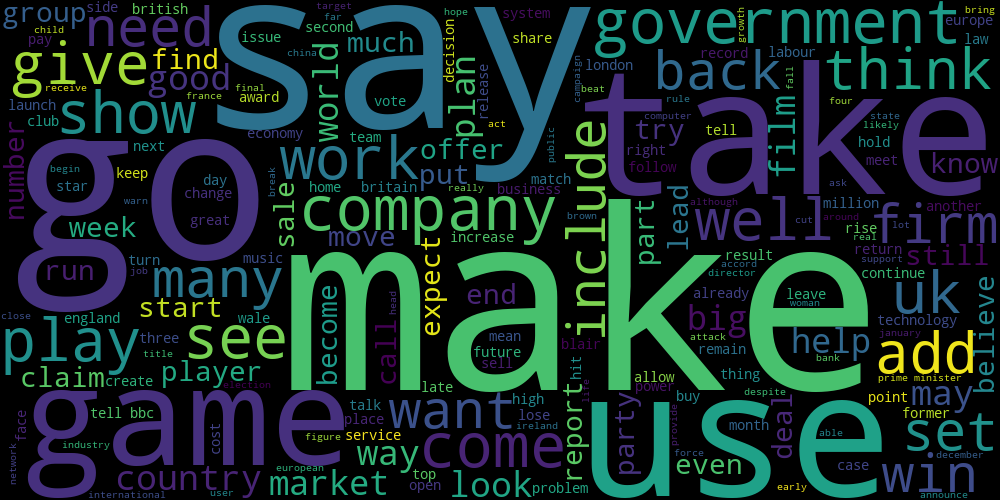

In [52]:
fig = px.imshow(wordCloud,color_continuous_scale='gray')
fig.update_layout(coloraxis_showscale=False)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

In [53]:
heading_sport = df_news[df_news["category"] == "sport"]
collapsed_heading_sport = heading_sport["clean_text"].str.cat(sep=' ')

heading_business = df_news[df_news["category"] == "business"]
collapsed_heading_business = heading_business["clean_text"].str.cat(sep=' ')

heading_politics = df_news[df_news["category"] == "politics"]
collapsed_heading_politics = heading_politics["clean_text"].str.cat(sep=' ')

heading_tech = df_news[df_news["category"] == "tech"]
collapsed_heading_tech = heading_tech["clean_text"].str.cat(sep=' ')

heading_entertainment = df_news[df_news["category"] == "entertainment"]
collapsed_heading_entertainment = heading_entertainment["clean_text"].str.cat(sep=' ')


## Word Cloud for Sport

Word Cloud for sport


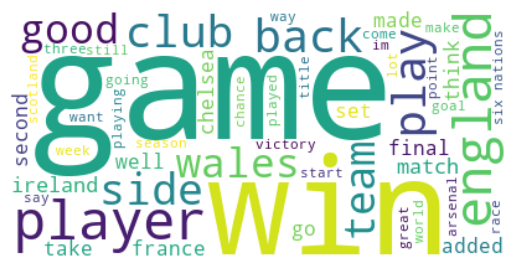

In [54]:
stopwords=set(STOPWORDS)
print("Word Cloud for sport")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_sport)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Word Cloud for Business

Word Cloud for business


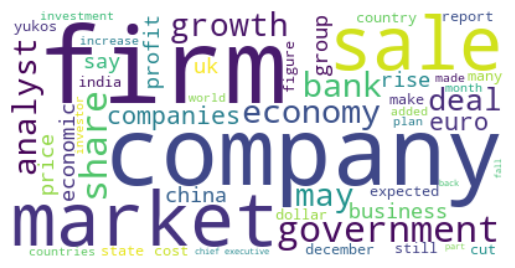

In [55]:
print("Word Cloud for business")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_business)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Word Cloud for Politics

Word Cloud for politics


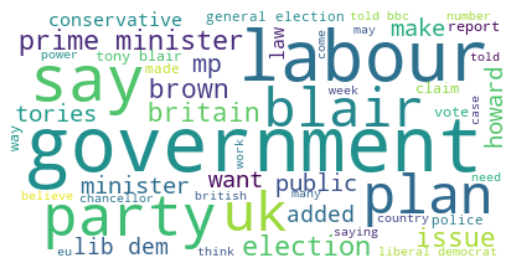

In [56]:
print("Word Cloud for politics")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_politics)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Word Cloud for Tech

Word Cloud for tech


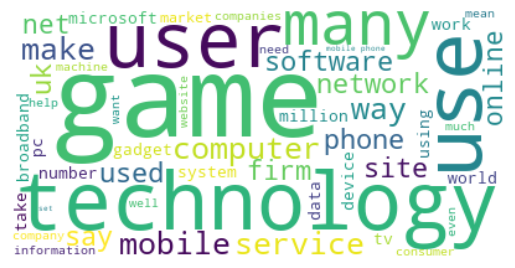

In [57]:
print("Word Cloud for tech")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_tech)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Word Cloud for entertainment

Word Cloud for entertainment


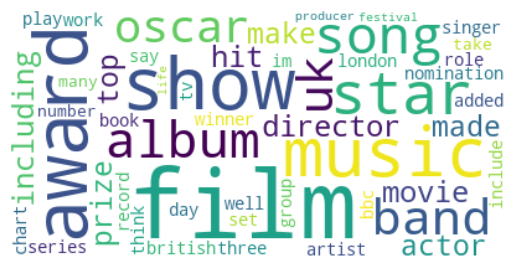

In [58]:
print("Word Cloud for entertainment")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_entertainment)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
df_news

category                                         clean_text  \
0     business  ad sales boost warner profit quarterly profits...   
1     business  dollar gains greenspan speech dollar hit highe...   
2     business  yukos unit buyer faces loan claim owners embat...   
3     business  high fuel prices hit bas profits british airwa...   
4     business  pernod takeover talk lifts domecq shares uk dr...   
...        ...                                                ...   
2219      tech  consoles promise big problems making games fut...   
2220      tech  bt program beat dialler scams bt introducing i...   
2222      tech  careful code european directive put software w...   
2223      tech  cyber security chief resigns man making sure c...   
2224      tech  losing online gaming online role playing games...   

                                          Lemmatization  
0     ad sale boost warner profit quarterly profit m...  
1     dollar gain greenspan speech dollar hit high l...  
2     yukos unit buyer face loan claim owner embattl...  
3     high fuel price hit bas profit british airway ...  
4     pernod takeover talk lift domecq share uk drin...  
...                                                 ...  
2219  console promise big problem make game future c...  
2220  bt program beat dialler scam bt introduce init...  
2222  careful code european directive put software w...  
2223  cyber security chief resign man make sure comp...  
2224  lose online game online role play game timecon...  

[2117 rows x 3 columns]

# Splitting the Features and Target

In [60]:
x = df_news.iloc[:,1:3]
y = df_news['category']

In [61]:
x

clean_text  \
0     ad sales boost warner profit quarterly profits...   
1     dollar gains greenspan speech dollar hit highe...   
2     yukos unit buyer faces loan claim owners embat...   
3     high fuel prices hit bas profits british airwa...   
4     pernod takeover talk lifts domecq shares uk dr...   
...                                                 ...   
2219  consoles promise big problems making games fut...   
2220  bt program beat dialler scams bt introducing i...   
2222  careful code european directive put software w...   
2223  cyber security chief resigns man making sure c...   
2224  losing online gaming online role playing games...   

                                          Lemmatization  
0     ad sale boost warner profit quarterly profit m...  
1     dollar gain greenspan speech dollar hit high l...  
2     yukos unit buyer face loan claim owner embattl...  
3     high fuel price hit bas profit british airway ...  
4     pernod takeover talk lift domecq share uk drin...  
...                                                 ...  
2219  console promise big problem make game future c...  
2220  bt program beat dialler scam bt introduce init...  
2222  careful code european directive put software w...  
2223  cyber security chief resign man make sure comp...  
2224  lose online game online role play game timecon...  

[2117 rows x 2 columns]

In [62]:
y

0       business
1       business
2       business
3       business
4       business
          ...   
2219        tech
2220        tech
2222        tech
2223        tech
2224        tech
Name: category, Length: 2117, dtype: object

In [63]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [64]:
y

array([0, 0, 0, ..., 4, 4, 4])

# Splitting the data into Training data & Testing Data

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=1) 


In [66]:
x_train.shape

(1587, 2)

# Applying Bag of Words

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
cv = CountVectorizer()

In [69]:
x_train_bow = cv.fit_transform(x_train['Lemmatization']).toarray()
x_test_bow = cv.transform(x_test['Lemmatization']).toarray()

In [70]:
x_train_bow.shape 

(1587, 25095)

In [71]:
x_test_bow.shape

(530, 25095)

# Using GaussianNB

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_bow,y_train)

GaussianNB()

In [73]:
y_pred = gnb.predict(x_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
accuracy_score(y_test,y_pred)

0.9207547169811321

In [74]:
con = confusion_matrix(y_test,y_pred)

In [75]:
con

array([[108,   2,   3,   1,   7],
       [  1,  90,   4,   1,   6],
       [  9,   0,  91,   0,   0],
       [  2,   0,   1, 113,   0],
       [  1,   2,   2,   0,  86]])

In [76]:
true_positive = con[0][0]
false_positive = con[0][1]
false_negative = con[1][0]
true_negative = con[1][1]

In [77]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9818181818181818

In [78]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9908256880733946

In [79]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9863013698630138

# Using Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train_bow,y_train)
y_pred = rf.predict(x_test_bow)
accuracy_score(y_test,y_pred)


0.9490566037735849

In [81]:
con= confusion_matrix(y_test,y_pred)

In [82]:
con

array([[119,   0,   1,   0,   1],
       [  4,  96,   1,   0,   1],
       [  5,   0,  95,   0,   0],
       [  0,   0,   0, 116,   0],
       [  5,   6,   0,   3,  77]])

In [83]:
true_positive = con[0][0]
false_positive = con[0][1]
false_negative = con[1][0]
true_negative = con[1][1]

In [84]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [85]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.967479674796748

In [86]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9834710743801653

# Using Ngram

In [87]:
cv = CountVectorizer(ngram_range=(1,2))

x_train_bow = cv.fit_transform(x_train['Lemmatization']).toarray()
x_test_bow = cv.transform(x_test['Lemmatization']).toarray()
rf= RandomForestClassifier()

rf.fit(x_train_bow,y_train)

y_pred = rf.predict(x_test_bow)
accuracy_score(y_test,y_pred)

0.9415094339622642

In [88]:
con= confusion_matrix(y_test,y_pred)

In [89]:
con

array([[119,   0,   1,   0,   1],
       [  6,  93,   0,   2,   1],
       [  7,   0,  93,   0,   0],
       [  0,   0,   0, 116,   0],
       [  7,   5,   0,   1,  78]])

In [90]:
true_positive = con[0][0]
false_positive = con[0][1]
false_negative = con[1][0]
true_negative = con[1][1]

In [91]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [92]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.952

In [93]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9754098360655737

# Using Multinomial NB

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

ml = MultinomialNB()  # Initialize the Multinomial Naive Bayes classifier

ml.fit(x_train_bow, y_train)  # Fit the classifier to the training data

y_pred = ml.predict(x_test_bow)  # Make predictions on the test data

accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy score

print("Accuracy:", accuracy)


Accuracy: 0.9811320754716981


# Best Model Accuracy - 98%

In [95]:
con= confusion_matrix(y_test,y_pred)

In [96]:
con

array([[119,   0,   1,   0,   1],
       [  0,  97,   2,   0,   3],
       [  1,   0,  98,   0,   1],
       [  0,   0,   0, 116,   0],
       [  0,   1,   0,   0,  90]])

In [97]:
true_positive = con[0][0]
false_positive = con[0][1]
false_negative = con[1][0]
true_negative = con[1][1]

In [98]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [99]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [100]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

1.0

## Precison - 1.0,  Recall - 1.0,  F1 Score - 1.0 

# Using TfidfVectorizer

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [102]:
tdidf= TfidfVectorizer()

In [103]:
x_train_bow = cv.fit_transform(x_train['Lemmatization']).toarray()
x_test_bow = cv.transform(x_test['Lemmatization']).toarray()

In [104]:
x_train_bow.shape 

(1587, 273283)

# Using  Random Forest Classifier

In [105]:
x_train_bow = cv.fit_transform(x_train['Lemmatization']).toarray()
x_test_bow = cv.transform(x_test['Lemmatization']).toarray()

In [106]:
rf= RandomForestClassifier()
rf.fit(x_train_bow,y_train)
y_pred = rf.predict(x_test_bow)
accuracy_score(y_test,y_pred)

0.9471698113207547

In [107]:
confusion_matrix(y_test,y_pred)

array([[119,   0,   1,   0,   1],
       [  5,  94,   1,   1,   1],
       [  5,   0,  95,   0,   0],
       [  0,   0,   0, 116,   0],
       [  5,   6,   1,   1,  78]])

In [108]:
true_positive = con[0][0]
false_positive = con[0][1]
false_negative = con[1][0]
true_negative = con[1][1]

In [109]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [110]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [111]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

1.0

# Using GaussianNB

In [112]:
gnb = GaussianNB()
gnb.fit(x_train_bow,y_train)

y_pred = gnb.predict(x_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9471698113207547

In [113]:
confusion_matrix(y_test,y_pred)

array([[110,   2,   1,   1,   7],
       [  1,  95,   1,   1,   4],
       [  5,   0,  94,   0,   1],
       [  1,   0,   0, 115,   0],
       [  0,   2,   1,   0,  88]])

In [114]:
true_positive = con[0][0]
false_positive = con[0][1]
false_negative = con[1][0]
true_negative = con[1][1]

In [115]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [116]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [117]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

1.0

# Using Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
Lgr = LogisticRegression()
Lgr.fit(x_train_bow,y_train)

LogisticRegression()

In [119]:
y_pred = gnb.predict(x_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
accuracy_score(y_test,y_pred)

0.9471698113207547

In [120]:
con= confusion_matrix(y_test,y_pred)

In [121]:
con

array([[110,   2,   1,   1,   7],
       [  1,  95,   1,   1,   4],
       [  5,   0,  94,   0,   1],
       [  1,   0,   0, 115,   0],
       [  0,   2,   1,   0,  88]])

In [122]:
true_positive = con[0][0]
false_positive = con[0][1]
false_negative = con[1][0]
true_negative = con[1][1]

In [123]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9821428571428571

In [124]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.990990990990991

In [125]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9865470852017937

# Using KNeighbors Classifier

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
kn= KNeighborsClassifier()

In [128]:
kn.fit(x_train_bow,y_train)

KNeighborsClassifier()

In [129]:
y_pred = gnb.predict(x_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9471698113207547

In [130]:
con= confusion_matrix(y_test,y_pred)

In [131]:
con

array([[110,   2,   1,   1,   7],
       [  1,  95,   1,   1,   4],
       [  5,   0,  94,   0,   1],
       [  1,   0,   0, 115,   0],
       [  0,   2,   1,   0,  88]])

In [132]:
true_positive = con[0][0]
false_positive = con[0][1]
false_negative = con[1][0]
true_negative = con[1][1]

In [133]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9821428571428571

In [134]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.990990990990991

In [135]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9865470852017937

#                                               Conclusion


## Based on the Data sets, used different - different  machine learning model used the best Accuracy is  Multinomial Naive Bayes Classifier (MultinomialNB) Accuracy- 98%. 

# Accuracy  -  98%
# precision -  1.0
# recall    -  1.0 
# F1-score  -  1.0 


In [166]:
# Create a dictionary with the data
data = {'Bag of Words Using': ['GaussianNB', 'Random Forest Classifier', 'Ngram', 'Multinomial NB'],
    'Accuracy': [92, 94, 94, 98],
    'Precision': [0.98, 1.0, 1.0, 1.0],
    'Recall': [0.99, 0.96, 0.95, 1.0],
    'F1-score': [0.98, 0.98, 0.97, 1.0]}
# Create a data frame from the dictionary
df = pd.DataFrame(data)
# Print the data frame
print(df)

         Bag of Words Using  Accuracy  Precision  Recall  F1-score
0                GaussianNB        92       0.98    0.99      0.98
1  Random Forest Classifier        94       1.00    0.96      0.98
2                     Ngram        94       1.00    0.95      0.97
3            Multinomial NB        98       1.00    1.00      1.00


In [168]:
# Create a dictionary with the data
data = {'TfidfVectorizer Using': ['Random Forest Classifier','GaussianNB', 'Logistic Regression', 'KNeighbors Classifier'],
    'Accuracy': [94, 94, 94, 94],
    'Precision': [1.0, 1.0, 0.98, 0.98],
    'Recall': [1.0, 1.0, 0.99, 0.99],
    'F1-score': [1.0, 1.0, 0.98, 0.98]}
# Create a data frame from the dictionary
df = pd.DataFrame(data)
# Print the data frame
print(df)

      TfidfVectorizer Using  Accuracy  Precision  Recall  F1-score
0  Random Forest Classifier        94       1.00    1.00      1.00
1                GaussianNB        94       1.00    1.00      1.00
2       Logistic Regression        94       0.98    0.99      0.98
3     KNeighbors Classifier        94       0.98    0.99      0.98
